In [1]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
df = pd.read_csv (r'general.csv')

I manually removed the channel joing in csv file. (filter by sub-type)

In [3]:
df.head()

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,21/03/2021 17:04,siand,hi everyone! see you tomorrow :),NaN,NaN,NaN,U01RW140HBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23/03/2021 07:02,NaN,same,NaN,NaN,NaN,U01S0MFJ3HR,1.616443e+09,U01SJKB2MG8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23/03/2021 07:26,NaN,"same, can you give access to <mailto:andreatog...",NaN,NaN,NaN,U01SD3CDH9P,1.616443e+09,U01SJKB2MG8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23/03/2021 07:41,NaN,my address is <mailto:karina.condeixa@gmail.co...,NaN,NaN,NaN,U01S79YDELR,1.616443e+09,U01SJKB2MG8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23/03/2021 07:42,NaN,Letâ€™s try using Slack forâ€¦how do we join z...,NaN,3.0,NaN,U01RS9Y6UJH,1.616485e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(630, 19)

### little bit of dataframe cleaning and organising

In [5]:
#Getting rid of empty fields in review text
df['text'].replace('', np.nan, inplace=True)
df.dropna(subset=['text'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 629
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              597 non-null    object 
 1   name              397 non-null    object 
 2   text              597 non-null    object 
 3   subtype           0 non-null      float64
 4   num_reply         75 non-null     float64
 5   num_participants  0 non-null      float64
 6   user              597 non-null    object 
 7   thred_ts          438 non-null    float64
 8   parent_user_id    363 non-null    object 
 9   Unnamed: 9        0 non-null      float64
 10  Unnamed: 10       0 non-null      float64
 11  Unnamed: 11       0 non-null      float64
 12  Unnamed: 12       0 non-null      float64
 13  Unnamed: 13       0 non-null      float64
 14  Unnamed: 14       0 non-null      float64
 15  Unnamed: 15       0 non-null      float64
 16  Unnamed: 16       0 non-null      float64
 1

In [7]:
howdofeel = TextBlob("nice")
howdofeel.sentiment

Sentiment(polarity=0.6, subjectivity=1.0)

In [8]:
#random look into comments to check their nature
df['text'].iloc[6]

'I believe that is the same link'

In [9]:
df['text'].iloc[66]

'<https://zoom.us/j/877626245>\npw: 986565'

In [10]:
df.head()

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,21/03/2021 17:04,siand,hi everyone! see you tomorrow :),NaN,NaN,NaN,U01RW140HBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23/03/2021 07:02,NaN,same,NaN,NaN,NaN,U01S0MFJ3HR,1.616443e+09,U01SJKB2MG8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23/03/2021 07:26,NaN,"same, can you give access to <mailto:andreatog...",NaN,NaN,NaN,U01SD3CDH9P,1.616443e+09,U01SJKB2MG8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23/03/2021 07:41,NaN,my address is <mailto:karina.condeixa@gmail.co...,NaN,NaN,NaN,U01S79YDELR,1.616443e+09,U01SJKB2MG8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23/03/2021 07:42,NaN,Letâ€™s try using Slack forâ€¦how do we join z...,NaN,3.0,NaN,U01RS9Y6UJH,1.616485e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['thanks'] = ''

In [12]:
# count and add thanks as a column
for a in range(len(df)):
    if 'thanks' in str(df.iloc[a,2]):
        df['thanks'] = 1
    else:
        df['thanks'] = 0  


In [13]:
df.head

<bound method NDFrame.head of                  time   name  \
0    21/03/2021 17:04  siand   
1    23/03/2021 07:02    NaN   
2    23/03/2021 07:26    NaN   
3    23/03/2021 07:41    NaN   
4    23/03/2021 07:42    NaN   
..                ...    ...   
625  27/04/2021 10:40    NaN   
626  27/04/2021 10:40  siand   
627  27/04/2021 10:40  siand   
628  27/04/2021 10:41  siand   
629  27/04/2021 10:42  siand   

                                                  text  subtype  num_reply  \
0                     hi everyone! see you tomorrow :)      NaN        NaN   
1                                                 same      NaN        NaN   
2    same, can you give access to <mailto:andreatog...      NaN        NaN   
3    my address is <mailto:karina.condeixa@gmail.co...      NaN        NaN   
4    Letâ€™s try using Slack forâ€¦how do we join z...      NaN        3.0   
..                                                 ...      ...        ...   
625  just to warn you though, the whole

In [14]:
#Pulling out the text from review text, ready for analysis. 
blob = [TextBlob(i) for i in df['text']]#

## Word Counts. Specified words and phrases
What frequent words can we find?


In [15]:
# How many times did we say thanks: 
thanks = []

for a in range(len(blob)):
    x = blob[a].words.count('thanks')
    y = blob[a].words.count('thank you')
    c = blob[a].words.count('ta')
    thanks.append(x)
    thanks.append(y)
    thanks.append(c)
    
   

In [16]:
sum(thanks)
# it would be nice to have thanks as a column in the data frame - go back and do this. 

39

In [17]:
# How many times did we say nice: 
nice = []

for a in range(len(blob)):
    y = blob[a].words.count('nice')
    nice.append(y)
    

In [18]:
sum(nice)

7

In [19]:
# How many times did we say cool: 
cool = []

for a in range(len(blob)):
    y = blob[a].words.count('cool')
    cool.append(y)

In [20]:
sum(cool)

3

## Finding groups of words and comparing
grouping words in 2s and 3s then seeing if those groupings recur 

In [21]:
thwords = []

for a in range(len(blob)):
    y = blob[a].ngrams(n=3)
    thwords.append(y)

In [22]:
thwords

[[WordList(['hi', 'everyone', 'see']),
  WordList(['everyone', 'see', 'you']),
  WordList(['see', 'you', 'tomorrow'])],
 [],
 [WordList(['same', 'can', 'you']),
  WordList(['can', 'you', 'give']),
  WordList(['you', 'give', 'access']),
  WordList(['give', 'access', 'to']),
  WordList(['access', 'to', 'mailto']),
  WordList(['to', 'mailto', 'andreatognoli001']),
  WordList(['mailto', 'andreatognoli001', 'gmail.com|andreatognoli001']),
  WordList(['andreatognoli001', 'gmail.com|andreatognoli001', 'gmail.com']),
  WordList(['gmail.com|andreatognoli001', 'gmail.com', 'pls'])],
 [WordList(['my', 'address', 'is']),
  WordList(['address', 'is', 'mailto']),
  WordList(['is', 'mailto', 'karina.condeixa']),
  WordList(['mailto', 'karina.condeixa', 'gmail.com|karina.condeixa']),
  WordList(['karina.condeixa', 'gmail.com|karina.condeixa', 'gmail.com'])],
 [WordList(['Letâ€™s', 'try', 'using']),
  WordList(['try', 'using', 'Slack']),
  WordList(['using', 'Slack', 'forâ€¦how']),
  WordList(['Slack',

In [23]:
#Put this in a dataframe to  make it readable
thwordsdf = pd.DataFrame(thwords)

In [24]:
thwordsdf

,0,1,2,3,4,5,6,7,8,9,...,306,307,308,309,310,311,312,313,314,315
0,"[hi, everyone, see]","[everyone, see, you]","[see, you, tomorrow]",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"[same, can, you]","[can, you, give]","[you, give, access]","[give, access, to]","[access, to, mailto]","[to, mailto, andreatognoli001]","[mailto, andreatognoli001, gmail.com|andreatog...","[andreatognoli001, gmail.com|andreatognoli001,...","[gmail.com|andreatognoli001, gmail.com, pls]",None,...,None,None,None,None,None,None,None,None,None,None
3,"[my, address, is]","[address, is, mailto]","[is, mailto, karina.condeixa]","[mailto, karina.condeixa, gmail.com|karina.con...","[karina.condeixa, gmail.com|karina.condeixa, g...",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"[Letâ€™s, try, using]","[try, using, Slack]","[using, Slack, forâ€¦how]","[Slack, forâ€¦how, do]","[forâ€¦how, do, we]","[do, we, join]","[we, join, zoom]","[join, zoom, today]","[zoom, today, and]","[today, and, every]",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,"[just, to, warn]","[to, warn, you]","[warn, you, though]","[you, though, the]","[though, the, whole]","[the, whole, zip]","[whole, zip, file]","[zip, file, of]","[file, of, today]","[of, today, looks]",...,None,None,None,None,None,None,None,None,None,None
593,"[because, it, contains]","[it, contains, text]","[contains, text, files]","[text, files, with]","[files, with, the]","[with, the, links]","[the, links, information]","[links, information, about]","[information, about, each]","[about, each, lecture]",...,None,None,None,None,None,None,None,None,None,None
594,"[but, yes, i]","[yes, i, am]","[i, am, sure]","[am, sure, you]","[sure, you, guys]","[you, guys, can]","[guys, can, wrangle]","[can, wrangle, it]",None,None,...,None,None,None,None,None,None,None,None,None,None
595,"[just, your, average]","[your, average, 200]","[average, 200, mb]","[200, mb, file]","[mb, file, lol]",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [25]:
## STUCK: How to cross check all the items against each other so that I can find duplicate1?? - typical error message: TypeError: unhashable type: 'WordList'
#thwordsdf.duplicated(subset=None, keep='first')

In [26]:
#Also cannot export to excel or csv - RecursionError: maximum recursion depth exceeded while calling a Python object


In [28]:
#thwords is now a big embedded list.  Need to flatten in out before we can itterate it to see if there are any matches. Found a random bit of code on the internet to do this. 

from functools import reduce

single_list = reduce(lambda x,y: x+y, thwords)
print(single_list)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [29]:
dfsingle_list = pd.DataFrame(single_list)

In [30]:
dfsingle_list

,0,1,2
0,hi,everyone,see
1,everyone,see,you
2,see,you,tomorrow
3,same,can,you
4,can,you,give
...,...,...,...
10490,add,that,to
10491,that,to,your
10492,to,your,to
10493,your,to,do


In [31]:
duplicateRowsDF = dfsingle_list[dfsingle_list.duplicated()]

duplicateRowsDF

,0,1,2
185,and,enter,the
367,you,'ve,put
368,'ve,put,the
498,a,lot,of
584,to,take,a
...,...,...,...
10456,be,messy,to
10457,messy,to,work
10458,to,work,with
10479,with,any,links


In [32]:
# Still havent worked this out - but you're very close to it - come back later!
duplicateRowsDF.to_csv('duplicates.csv')

PROGRESS 16.05: Got the list here - but need to count and print duplicates.

## Sentiment Analysis

In [33]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None


In [34]:
df['polarity']=df['text'].apply(sentiment).apply(lambda x: x[0])


In [35]:
df.head(60)

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,thanks,polarity
0,21/03/2021 17:04,siand,hi everyone! see you tomorrow :),NaN,NaN,NaN,U01RW140HBP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.500000
1,23/03/2021 07:02,NaN,same,NaN,NaN,NaN,U01S0MFJ3HR,1.616443e+09,U01SJKB2MG8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
2,23/03/2021 07:26,NaN,"same, can you give access to <mailto:andreatog...",NaN,NaN,NaN,U01SD3CDH9P,1.616443e+09,U01SJKB2MG8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
3,23/03/2021 07:41,NaN,my address is <mailto:karina.condeixa@gmail.co...,NaN,NaN,NaN,U01S79YDELR,1.616443e+09,U01SJKB2MG8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
4,23/03/2021 07:42,NaN,Letâ€™s try using Slack forâ€¦how do we join z...,NaN,3.0,NaN,U01RS9Y6UJH,1.616485e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
5,23/03/2021 07:42,Thamo,"Same link as yesterday, the message is pinned ...",NaN,NaN,NaN,U01S7BM4N81,1.616485e+09,U01RS9Y6UJH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
6,23/03/2021 07:42,NaN,I believe that is the same link,NaN,NaN,NaN,U01S79YDELR,1.616485e+09,U01RS9Y6UJH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
7,23/03/2021 07:43,NaN,ok thanks,NaN,NaN,NaN,U01RS9Y6UJH,1.616485e+09,U01RS9Y6UJH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.350000
8,23/03/2021 07:44,NaN,Thanks Thamo!,NaN,NaN,NaN,U01S79YDELR,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.250000
9,23/03/2021 07:44,Thamo,:v:welcome,NaN,NaN,NaN,U01S7BM4N81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000


<AxesSubplot:xlabel='polarity', ylabel='Count'>

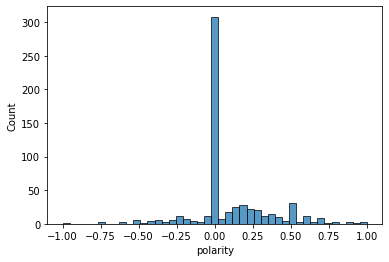

In [36]:
sns.histplot(df['polarity'])

In [37]:
PR = []
for i in df['polarity']:
    if i > 0.49:
        PR.append('Positive')
    elif i > 0:
        PR.append('Neutral')
    elif i == 0:
        PR.append('Na')
    else:
        PR.append('Negative')

In [38]:
df['p_rating'] = PR
df

,time,name,text,subtype,num_reply,num_participants,user,thred_ts,parent_user_id,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,thanks,polarity,p_rating
0,21/03/2021 17:04,siand,hi everyone! see you tomorrow :),NaN,NaN,NaN,U01RW140HBP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.500,Positive
1,23/03/2021 07:02,NaN,same,NaN,NaN,NaN,U01S0MFJ3HR,1.616443e+09,U01SJKB2MG8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000,Na
2,23/03/2021 07:26,NaN,"same, can you give access to <mailto:andreatog...",NaN,NaN,NaN,U01SD3CDH9P,1.616443e+09,U01SJKB2MG8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000,Na
3,23/03/2021 07:41,NaN,my address is <mailto:karina.condeixa@gmail.co...,NaN,NaN,NaN,U01S79YDELR,1.616443e+09,U01SJKB2MG8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000,Na
4,23/03/2021 07:42,NaN,Letâ€™s try using Slack forâ€¦how do we join z...,NaN,3.0,NaN,U01RS9Y6UJH,1.616485e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,27/04/2021 10:40,NaN,"just to warn you though, the whole zip file of...",NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.200,Neutral
626,27/04/2021 10:40,siand,"because it contains text files with the links,...",NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000,Na
627,27/04/2021 10:40,siand,but yes i am sure you guys can wrangle it!,NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.625,Positive
628,27/04/2021 10:41,siand,just your average 200 mb file lol,NaN,NaN,NaN,U01RW140HBP,1.619519e+09,U01RW140HBP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.325,Neutral


## A sentiment rating per user

In [39]:
user_polrate = df.groupby(['user']).polarity.min()

In [40]:
user_polrate

user
U01RKN0EGDV   -0.312500
U01RN7BVD1C   -0.370833
U01RP2K1606    0.000000
U01RRV4JX6Z   -1.000000
U01RS9Y6UJH   -0.150000
U01RSRE0N3D   -0.500000
U01RUTP1ZQB   -0.300000
U01RUU9SK4K    0.150000
U01RV3K524T    0.075000
U01RW140HBP   -0.500000
U01RW2X7S9Z   -0.625000
U01RXCQHMHT   -0.400000
U01S081EULS    0.000000
U01S0E0MRJ7    0.000000
U01S0MFJ3HR    0.000000
U01S0P26NKD   -0.166667
U01S133DZ9A   -0.456250
U01S65G72SY    0.000000
U01S6L7HLUC    0.000000
U01S6LCPM0C    0.400000
U01S79YDELR   -0.500000
U01S7BM4N81   -0.500000
U01S7KCL3DF   -0.750000
U01SD3CDH9P   -0.750000
U01SJKB2MG8   -0.400000
U01SK96QF5E   -0.045833
Name: polarity, dtype: float64

Maybe if you can group the conversations. You can apply this to get the sentiment ranking per conversation ? 

## List of noun phrases

In [41]:
nouns = [x.noun_phrases for x in blob]
nouns

[WordList([]),
 WordList([]),
 WordList(['< mailto', 'andreatognoli001 @ gmail.com|andreatognoli001 @ gmail.com >']),
 WordList(['< mailto', 'karina.condeixa @ gmail.com|karina.condeixa @ gmail.com >']),
 WordList(['letâ€™s', 'slack']),
 WordList([]),
 WordList([]),
 WordList(['ok thanks']),
 WordList(['thanks thamo']),
 WordList([]),
 WordList([]),
 WordList(['< mailto', 'anja.fechner @ live.de|anja.fechner @ live.de >']),
 WordList(['< https', 'pwd=yjftwlpinhrdzzg4k0j5dwvkchizzz09 >', 'pinning', 'meeting link']),
 WordList([]),
 WordList(['< https', '//zoom.us/j/877626245 >']),
 WordList([]),
 WordList(["i 'll delete"]),
 WordList([]),
 WordList([]),
 WordList(['karina']),
 WordList([]),
 WordList([]),
 WordList(['channel >', 'permissions < https', '//data-ft-ber-03-2021.slack.com/archives/c01rkrms10w/p1616443201022100 >']),
 WordList([]),
 WordList(['class zoom']),
 WordList(['< @', 'u01sjkb2mg8', '> i']),
 WordList(['user name']),
 WordList(['channel >', 'quizme', '< http', '//www.

In [43]:
#thwords is now a big embedded list.  Need to flatten in out before we can itterate it to see if there are any matches. Found a random bit of code on the internet to do this. 

from functools import reduce

flatnouns = reduce(lambda x,y: x+y, nouns)
print(flatnouns)

['< mailto', 'andreatognoli001 @ gmail.com|andreatognoli001 @ gmail.com >', '< mailto', 'karina.condeixa @ gmail.com|karina.condeixa @ gmail.com >', 'letâ€™s', 'slack', 'ok thanks', 'thanks thamo', '< mailto', 'anja.fechner @ live.de|anja.fechner @ live.de >', '< https', 'pwd=yjftwlpinhrdzzg4k0j5dwvkchizzz09 >', 'pinning', 'meeting link', '< https', '//zoom.us/j/877626245 >', "i 'll delete", 'karina', 'channel >', 'permissions < https', '//data-ft-ber-03-2021.slack.com/archives/c01rkrms10w/p1616443201022100 >', 'class zoom', '< @', 'u01sjkb2mg8', '> i', 'user name', 'channel >', 'quizme', '< http', '//www.kahoot.it|www.kahoot.it >', 'pin', 'karina', '< @', 'u01sd3cdh9p', 'yeyyyy', 'thanks', 'pinâ', 'works fineâ€¦', 'link < https', '//zoom.us/j/877626245 >', 'notion link < https', '//www.notion.so/ironhack/berlin-data-classroom-5f8f3ff27075492b8b457677368fda2d >', 'doesnt show', 'docx file', 'excel', 'excel', 'histogram', 'chart type', '< https', '//statistics.laerd.com/statistical-guid

In [44]:
dfflatnouns = pd.DataFrame(flatnouns)
dfflatnouns

,0
0,< mailto
1,andreatognoli001 @ gmail.com|andreatognoli001 ...
2,< mailto
3,karina.condeixa @ gmail.com|karina.condeixa @ ...
4,letâ€™s
...,...
1584,notion calendar
1585,notion page
1586,useful resources
1587,bookmarks directlyâ€¦


In [46]:
dfflatnouns.to_csv('noun_phrases.csv')

PROGRESS 16.05: Got the list here - but need to count and print duplicates.

## Count emojis and links
Progress 16.05: Got to count links and emojis in dataframe - Now need to print them so that we can list all links and track different emoji reactions per post. 

In [ ]:
#Which roes contain urls?
url = []

for a in range(len(blob)): 
    if 'https' in blob[a]:
        url.append(1)
    else:
        url.append(0)
       

In [ ]:
df['url'] =url
df.head(40)

In [ ]:
#How to return a new list with all the urls
urls = []

for a in range(len(blob)): 
    if 'https' in blob[a]:
        spl_word = 'https'
        res = blob[a].partition(spl_word)[2]
        url.append(res)
    else:
        url.append(0)

In [ ]:
urls

## emojis

In [ ]:
#Needs some work. Got to count of emojis - sort of. 
import re
emoji = []
for a in range(len(blob)):
    regex = re.compile(':')
    matches = [string for string in blob[a] if re.match(regex, string)]
    emoji.append(matches)

In [ ]:
df['emoji'] = emoji
df.head(30)